In [90]:
import os
import argparse
import json
import numpy as np
import pandas as pd
# import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, ELU, Lambda, Dropout, Flatten, Dense

In [44]:
# Display settings
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

In [189]:
def load_data(data_folders):
    dfs = []
    for d in data_folders:
        df = pd.read_csv(d + 'driving_log.csv') 
        df.center = d + df.center.str.strip()
        df.left = d + df.left.str.strip()
        df.right = d + df.right.str.strip()
        dfs.append(df.copy())
    return pd.concat(dfs, ignore_index=True)

In [194]:
def shift_steering(df, shift_value=0.25):
    center = df[['center', 'steering']].rename(columns={'center': 'image_path'})
    left = df[['left', 'steering']].rename(columns={'left': 'image_path'})
    right = df[['right', 'steering']].rename(columns={'right': 'image_path'})
    left['steering'] = np.minimum(left['steering'] + shift_value, 1.)
    right['steering'] = np.maximum(right['steering'] - shift_value, -1.)
    return pd.concat((center, left, right), ignore_index=True)

In [192]:
df = load_data(['./data/sim_data/','./data/udacity_data/'])

In [195]:
df = shift_steering(df)

-0.5459642


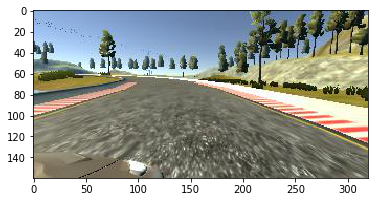

In [361]:
sample = df.sample(1)
img = cv2.imread(sample.image_path.values[0])
steer = sample.steering.values[0]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
print(steer)

1.2208084149687035


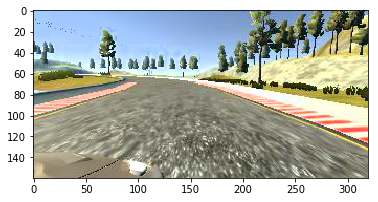

In [409]:
new_img = random_brightness(img)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_HSV2RGB))

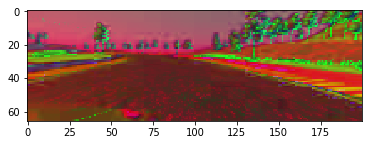

In [393]:
plt.imshow(cv2.cvtColor(cv2.resize(new_img, (200,66)), cv2.COLOR_BGR2RGB))